In [1]:
# Importing Necessary Libraries and Functions needed for the project

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

#### Performing Data Analysis

In [2]:
#reading the dataset
bike = pd.read_csv("day.csv")

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking Duplicates
bike.shape,bike.drop_duplicates().shape

((730, 16), (730, 16))

## The Above clearly show that 

1. There are 730 rows and 16 column
2. No null values in the dataset
3. No duplicates in the dataset

## Eliminating irrelevant columns

In [11]:
bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)


In [12]:
#Checking the dataset again
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Value Mapping

Note, there are many categorical columns that has value of 1,2,3 etc , hence in order to fit it into regression line, this should be converted into string

In [14]:
#mapping values of season from data dictionary
bike[['season']] = bike[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [19]:
#mapping values of mnth from data dictionary
bike[['mnth']] = bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'}))

In [20]:
#mapping values of weekday from data dictionary
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

In [22]:
#mapping values of weathersit from data dictionary
bike[['weathersit']] = bike[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain'
                                                                    ,4:'heavy rain & ice pallets',}))

In [23]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Visualization 

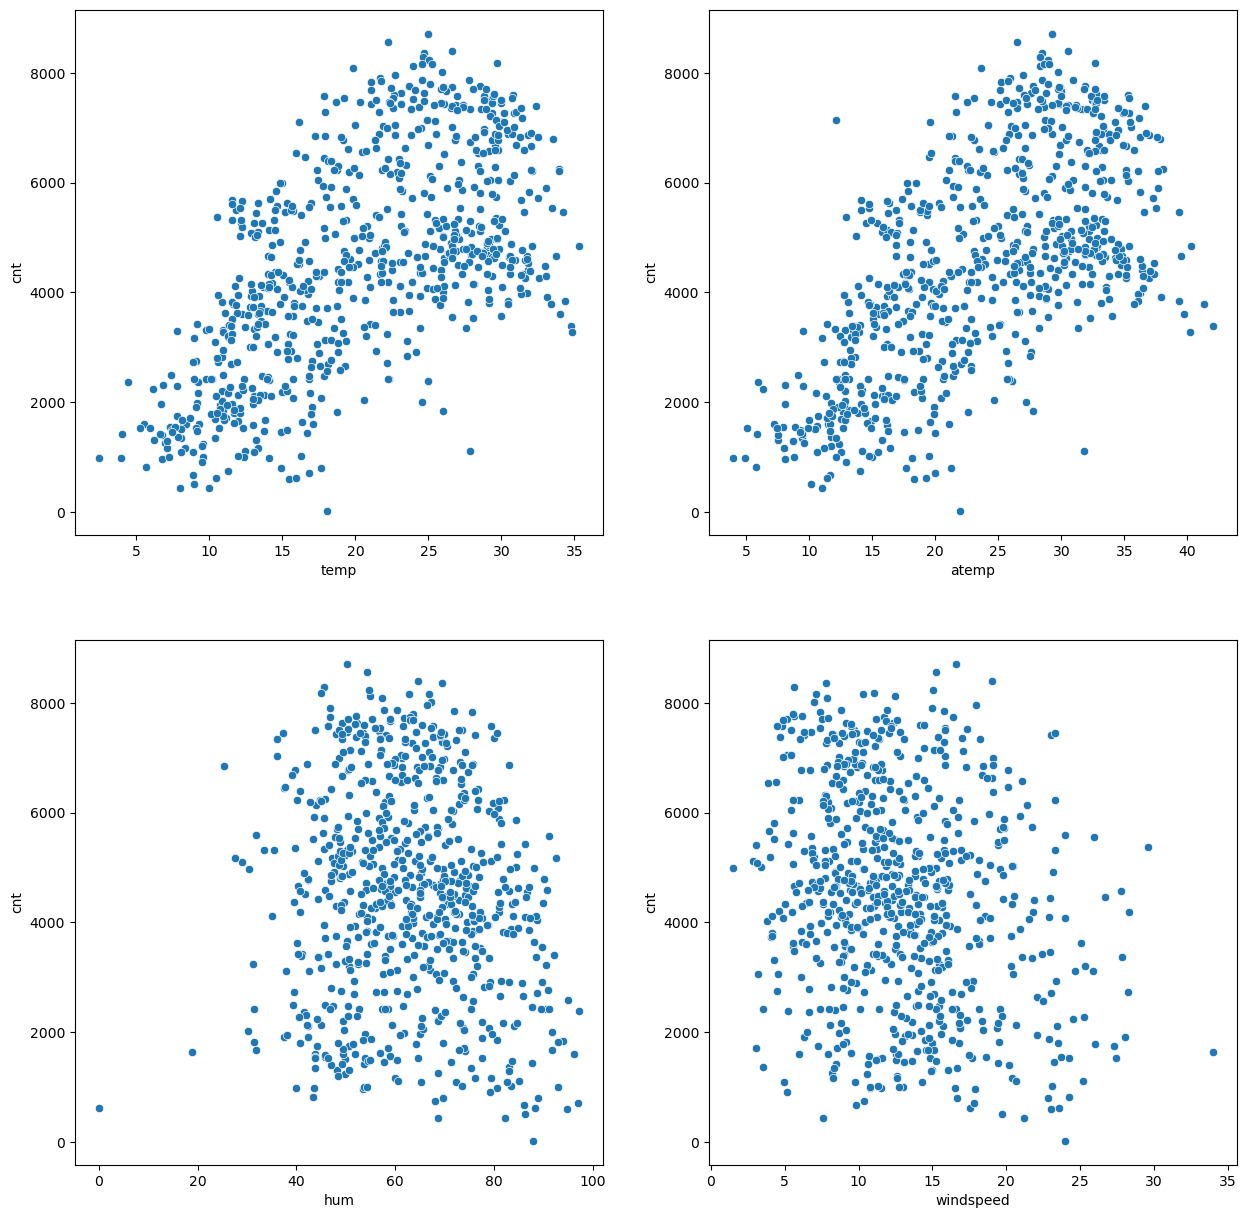

In [25]:
# creating scatterplot of all the numeric variables w.r.t to Target Variable

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike)
plt.show()

- Target Variable Cnt is postively correlated with temp and atemp variable.
- Target Variable Cnt is negatively correlated with hum and windspeed variable.

### Creating a boxplot of categorical  variables w.r.t to Target Variable

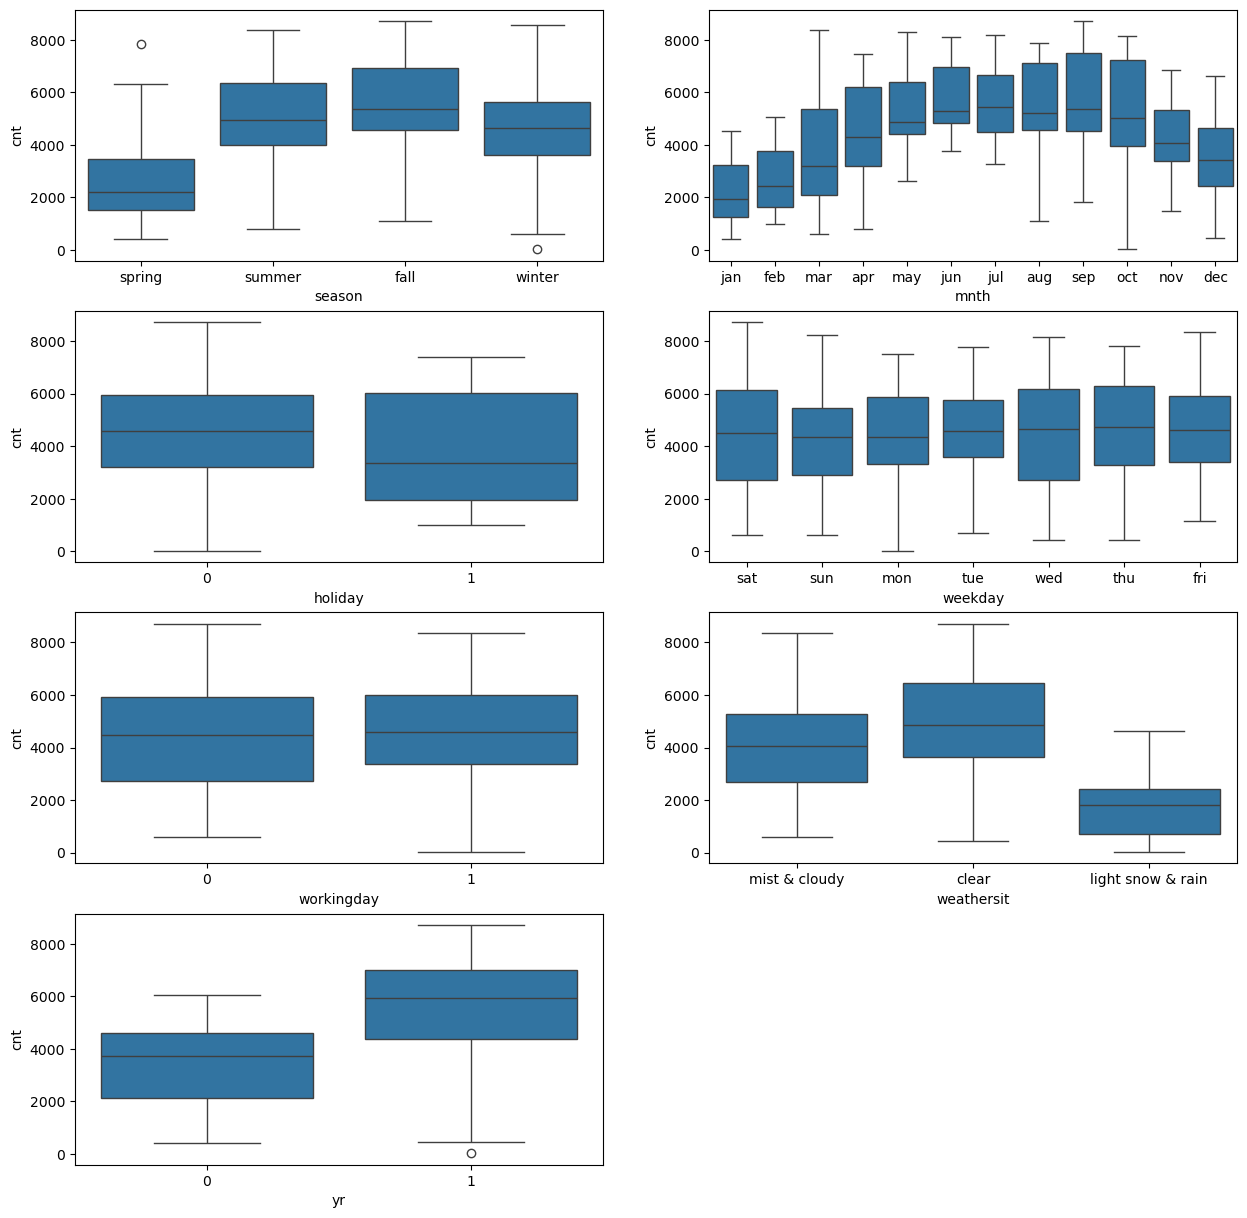

In [30]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

## Let's analyze the data based on what we see in the plot

1. Significant drop in target variable in spring season
2. Majority of bikes are rented in fall season.
3. Increasing trend in bikes rented in January to September with dip in month of November & December.
4. Majority of bikes are rented in the month of June to September.
5. Majority of bikes are rented in the month of June to September.
6. Majority of bikes are rented when there is no holiday.
7. There is pretty slight variation in bikes getting rented among days.
8. Bikes are rented more when there is clear weather.


## Data preperation

In [51]:

# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'])

In [52]:
# Check what the dataset 'season_dummy' looks like
season_dummy.head()

,fall,spring,summer,winter
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [53]:
# Let's drop the first column from season_dummy df using 'drop_first = True'
season_dummy = pd.get_dummies(bike['season'], drop_first = True)

In [54]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy' and dropping 1st column.
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)

In [55]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [57]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy' and dropping 1st column.
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

In [58]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [60]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

In [61]:
# Check what the dataset 'weathersit_dummy' looks like
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


In [62]:
# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,80.5833,10.749882,985,False,True,False,False
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,69.6087,16.652113,801,False,True,False,False
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,False,True,False,False
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,False,True,False,False
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,False,True,False,False


In [63]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' as we have created the dummies for it
bike.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

### Splitting the Data into Training and Testing Sets

In [64]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# We have considered 80 20 ratio of Train vs Test
bike_train, bike_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

# Rescaling the Features

In [65]:
scaler = MinMaxScaler()

In [66]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[bike_vars] = scaler.fit_transform(bike_train[bike_vars])

In [67]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
367,1,0,1,0.113228,0.454701,0.695175,0.254717,False,True,False,False
648,1,0,1,0.468352,0.477458,0.299450,0.868385,False,False,False,True
44,0,0,1,0.443431,0.387290,0.807474,0.217556,False,True,False,False
705,1,0,1,0.326094,0.787463,0.189819,0.573631,False,False,False,True
379,1,0,0,0.133996,0.431945,0.449210,0.263346,False,True,False,False


In [68]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [70]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [76]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train,y_train)


In [77]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [78]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [88]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [93]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [91]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


### Couldnt proceed beyond this step as i was already at the deadline of project submission